In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import date

%matplotlib inline
df=pd.read_csv('2015_trip_data.csv')
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [3]:
x = pd.DatetimeIndex(df['starttime'])
df['StartDate']=x.date
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['StartDay'] = df['StartDate'].dt.weekday_name


In [4]:
x = pd.DatetimeIndex(df['stoptime'])
df['StopDate']=x.date
df['StopDate'] = pd.to_datetime(df['StopDate'])
df['StopDay'] = df['StopDate'].dt.weekday_name

In [5]:
def clean_row(df, indexes, level):
    for idx in indexes:
        df=df.drop(idx, level=level)
    return df

In [7]:
Groupfrom = df.groupby(['from_station_id','StartDay']).size()
Groupto = df.groupby(['to_station_id','StopDay']).size()

In [8]:
Groupfrom=clean_row(Groupfrom, ['Pronto shop'], 'from_station_id')
Groupto=clean_row(Groupto, ['Pronto shop'], 'to_station_id')

In [9]:
Groupdiff=pd.DataFrame(Groupfrom-Groupto)

In [11]:
Groupdiff.reset_index(inplace=True)

In [12]:
Groupdiff.head()

,from_station_id,StartDay,0
0,BT-01,Friday,68
1,BT-01,Monday,15
2,BT-01,Saturday,7
3,BT-01,Sunday,-47
4,BT-01,Thursday,10


In [18]:
Groupdiff.columns=['StationId', 'Dayofweek', 'Difference']
Groupdiff.head()

,StationId,Dayofweek,Difference
0,BT-01,Friday,68
1,BT-01,Monday,15
2,BT-01,Saturday,7
3,BT-01,Sunday,-47
4,BT-01,Thursday,10


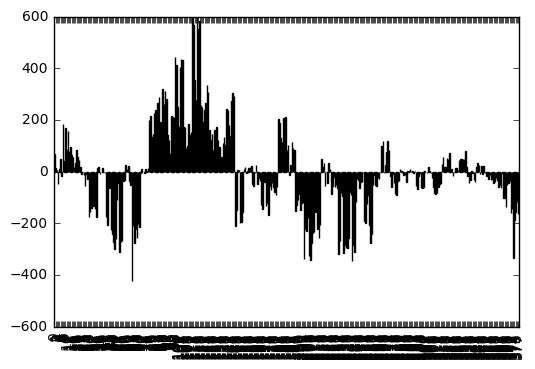

In [19]:
Groupdiff['Difference'].plot.bar()

In [14]:
def plot_bar(df, column, num, opts):
    df = df.set_index(['StationId'])
    n_groups=len(df.index)
    raw_index=np.arange(n_groups)
    rects=plt.bar(raw_index, df[column])
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(raw_index, df.index, rotation=90)
    else:
        labels=['' for x in df.index]
        plt.xticks(raw_index, labels)
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'][num])

In [15]:
import math
def plot_barN(df, total_plots, num_columns, opts, column):
    num_rows=math.ceil(total_plots/num_columns)
    idx=0
    local_opts=dict(opts)
    fig=plt.figure(figsize=(20, 16))
    if total_plots%num_columns==1:
        flag=True
    for i in range(total_plots):
        idx+=1
        local_opts['xticks']=False
        local_opts['xlabel']=''
        local_opts['ylabel']=''
        if flag and math.ceil(idx/num_columns)==num_rows-1 and idx%num_columns==0:
            local_opts['xticks']=True
            local_opts['xlabel']=opts['xlabel']         
        if math.ceil(idx/num_columns)==num_rows:
            local_opts['xticks']=True
            local_opts['xlabel']=opts['xlabel']            
        if idx%num_columns==1:
            local_opts['ylabel']=opts['ylabel']
        plt.subplot(num_rows, num_columns, idx)
        plot_bar(df.loc[df['Dayofweek']==i], column, i, local_opts)

In [26]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
titles={}
for i in range(len(days)):
    titles[i]= days[i]

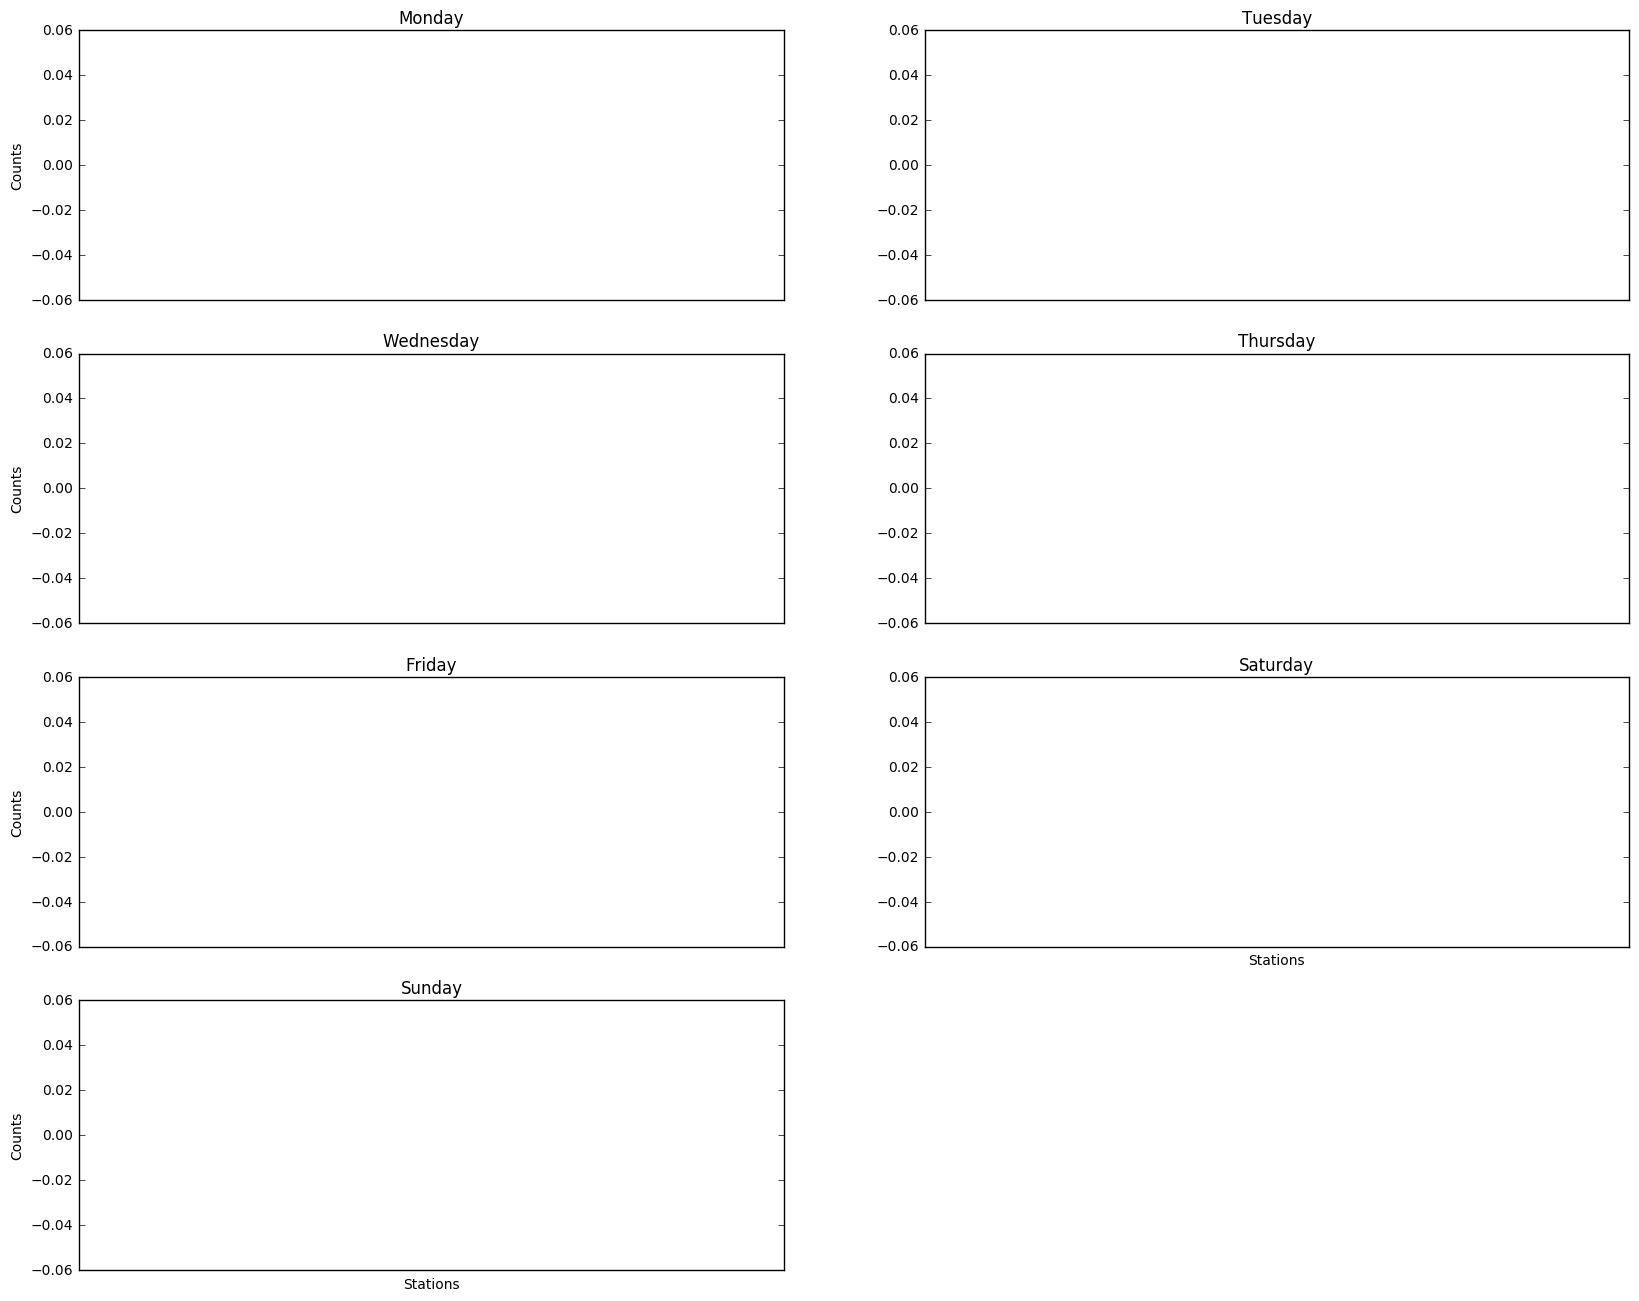

In [27]:
opts={'xlabel': 'Stations', 'ylabel': 'Counts', 'xticks': True, 'title': titles}
plot_barN(Groupdiff, 7, 2, opts, 'Difference')

Unable to figure out why the data isn't showing on these plots'